<a href="https://colab.research.google.com/github/EduardoTF/github-slideshow/blob/master/F%C3%ADsicaComputacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\beta\;$ functions

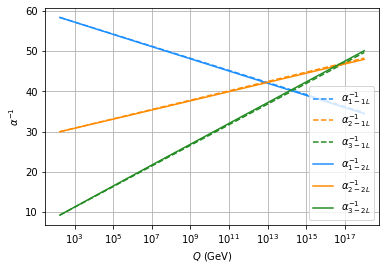

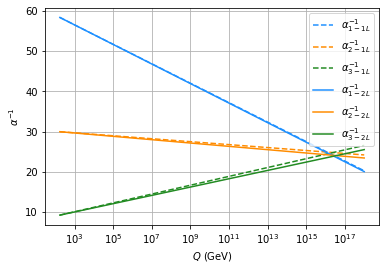

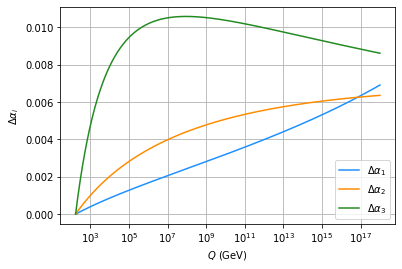

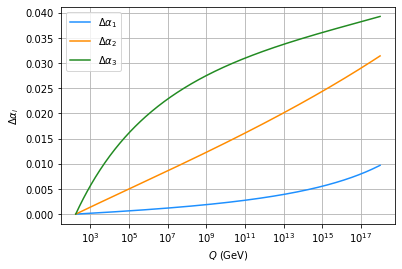

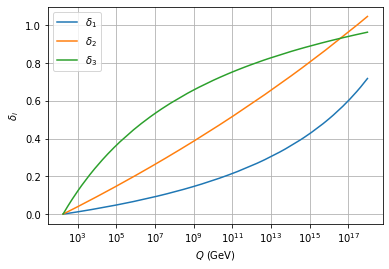

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

def DP_RK(f,x,y,xStop,h,tol): #Método de Dormand-Prince
 c2 = 1.0/5.0; c3 = 3.0/10.0; c4 = 4.0/5.0 #Coeficientes ci
 c5 = 8.0/9.0; c6 = 1.0; c7 = 1.0
 d51 = 35.0/384.0; d53 = 500.0/1113.0; d54 = 125.0/192.0 #Coeficientes d5l
 d55 = -2187.0/6784.0; d56 = 11.0/84.0
 d41 = 5179.0/57600.0; d43 = 7571.0/16695.0; d44 = 393.0/640.0 #Coeficientes d4l
 d45 = -92097.0/339200.0; d46 = 187.0/2100.0; d47 = 1.0/40.0
 a21 = 0.2
 a31 = 3.0/40.0; a32 = 9.0/40.0                                 #Coeficientes aij
 a41 = 44.0/45.0; a42 = -56.0/15.0; a43 = 32.0/9.0
 a51 = 19372.0/6561.0; a52 = -25360.0/2187.0; a53 = 64448.0/6561.0
 a54 = -212.0/729.0
 a61 = 9017.0/3168.0; a62 =-355.0/33.0; a63 = 46732.0/5247.0
 a64 = 49.0/176.0; a65 = -5103.0/18656.0
 a71 = 35.0/384.0; a73 = 500.0/1113.0; a74 = 125.0/192.0;
 a75 = -2187.0/6784.0; a76 = 11.0/84.0
 X = []
 Y = []
 X.append(x)
 Y.append(y)
 stopper = 0 # 0 continuar el cálculo, 1 para detenerlo
 k1 = h*f(x,y)
 for i in range(500):
  k2 = h*f(x + c2*h, y + a21*k1)
  k3 = h*f(x + c3*h, y + a31*k1 + a32*k2)
  k4 = h*f(x + c4*h, y + a41*k1 + a42*k2 + a43*k3)
  k5 = h*f(x + c5*h, y + a51*k1 + a52*k2 + a53*k3 + a54*k4)
  k6 = h*f(x + c6*h, y + a61*k1 + a62*k2 + a63*k3 + a64*k4 + a65*k5)
  k7 = h*f(x + c7*h, y + a71*k1 + a73*k3 + a74*k4 + a75*k5 + a76*k6)
  dy = d51*k1 + d53*k3 + d54*k4 + d55*k5 + d56*k6
  E = (d51 - d41)*k1 + (d53 - d43)*k3 + (d54 - d44)*k4 + (d55 - d45)*k5 + (d56 - d46)*k6 - d47*k6  #Error de truncamiento local
  e = sqrt(np.sum(E**2)/len(y))  #error cuadrático medio
  hNext = 0.9*h*(tol/e)**0.2

  if e <= tol: #Aceptar cálculo si está dentro de la tolerancia
   y = y + dy
   x=x+h
   X.append(x)
   Y.append(y)
   if stopper == 1: break #Alcanzó el final del intervalo
   if abs(hNext) > 10.0*abs(h): hNext = 10.0*h #Restricción para evitar h grandes

   if (h > 0.0) == ((x + hNext) >= xStop): #Verificar si el paso siguiente es el último para ajustar h
    hNext = xStop - x
    stopper = 1
   k1 = k7*hNext/h
  else:  #Reduce el paso cuando no está dentro de la tolerancia
   if abs(hNext) < 0.1*abs(h): hNext = 0.1*h
   k1 = k1*hNext/h
  h = hNext
 return np.array(X),np.array(Y)

#Número de generaciones n_g
n_g=3.0

#Valores de b_{l} para el SM
b_lM=np.zeros(3)
b_lM[0]=-(4.0/3.0)*n_g-(1.0/10.0)
b_lM[1]=(22.0/3.0)-(4.0/3.0)*n_g-(1.0/6.0)
b_lM[2]=11.0-(4.0/3.0)*n_g

#Valores de b_{l} para el MSSM
b_lS=np.zeros(3)
b_lS[0]=-33.0/5.0
b_lS[1]=-1.0
b_lS[2]=3.0

#Valores de b_{kl} para el SM
b_klM=np.array([[-(19.0/15.0)*n_g-(9.0/50.0) , -(1.0/5.0)*n_g-(3.0/10.0) , -(11.0/30.0)*n_g],\
               [-(3.0/5.0)*n_g-(9.0/10.0) , (136.0/3.0)-(49.0/3.0)*n_g-(13.0/6.0) , -(3.0/2.0)*n_g],\
               [-(44.0/15.0)*n_g , -4.0*n_g , 102.0-(76.0/3.0)*n_g]])

#Valores de b_{kl} para el MSSM
b_klS=np.array([[-199.0/25.0 , -27.0/5.0 , -88.0/5.0],\
               [-9.0/5.0 , -25.0 , -24.0],\
               [-11.0/5.0 , -9.0 , -14.0]])

#Funcion GM(Q,g)=[g'1(Q),g'2(Q),g'3(Q)] para el SM a 2 lazos
def GM(Q,g):
  GM=np.zeros(3)
  for i in range(3):
    GM[i]=GM[i]-b_lM[i]*(((g[i])**3)/((16.0*pi**2)*(Q)))
  for i in range(3):
    for k in range(3):
      GM[i]=GM[i]-(b_klM[k,i]*(g[k]**2)*(g[i]**3))/(((16.0*pi**2)**2)*(Q))
  return GM

#Funcion GS(Q,g)=[g'1(Q),g'2(Q),g'3(Q)] para el MSSM a 2 lazos
def GS(Q,g):
  GS=np.zeros(3)
  for i in range(3):
    GS[i]=GS[i]-b_lS[i]*(((g[i])**3)/((16.0*pi**2)*(Q)))
  for i in range(3):
    for k in range(3):
      GS[i]=GS[i]-(b_klS[k,i]*(g[k]**2)*(g[i]**3))/(((16.0*pi**2)**2)*(Q))
  return GS


tol=1e-10 #Tolerancia
#Condiciones iniciales de los parámetros de acoplaminto de norma
mt=173.34 #GeV Energía de la masa del quark top
g=np.array([sqrt(5.0/3.0)*(0.35940), 0.64754, 1.1666]) #Condiciones inciales de [g1(mt),g2(mt),g2(mt)]

Q1,G1=DP_RK(GM,mt,g,1e18,0.1,tol) #Soluciones de las funciones beta para el SM a 2 lazos
Q2,G2=DP_RK(GS,mt,g,1e18,0.1,tol) #Soluciones de las funciones beta para el MSSM a 2 lazos


def alpha_1M(Q): #Constante de acoplamiento alpha_1 para el SM a 1 lazo
    alpha_1M=1.0/(4.0*pi*(g[0]**(-2)+(b_lM[0]/(8.0*pi**2))*log(Q/mt)))
    return alpha_1M

def alpha_2M(Q): #Constante de acoplamiento alpha_2 para el SM a 1 lazo
    alpha_2M=1.0/(4.0*pi*(g[1]**(-2)+(b_lM[1]/(8.0*pi**2))*log(Q/mt)))
    return alpha_2M

def alpha_3M(Q): #Constante de acoplamiento alpha_3 para el SM a 1 lazo
    alpha_3M=1.0/(4.0*pi*(g[2]**(-2)+(b_lM[2]/(8.0*pi**2))*log(Q/mt)))
    return alpha_3M

def alpha_1S(Q): #Constante de acoplamiento alpha_1 para el MSSM a 1 lazo
    alpha_1S=1.0/(4.0*pi*(g[0]**(-2)+(b_lS[0]/(8.0*pi**2))*log(Q/mt)))
    return alpha_1S

def alpha_2S(Q): #Constante de acoplamiento alpha_2 para el MSSM a 1 lazo
    alpha_2S=1.0/(4.0*pi*(g[1]**(-2)+(b_lS[1]/(8.0*pi**2))*log(Q/mt)))
    return alpha_2S

def alpha_3S(Q): #Constante de acoplamiento alpha_3 para el MSSM a 1 lazo
    alpha_3S=1.0/(4.0*pi*(g[2]**(-2)+(b_lS[2]/(8.0*pi**2))*log(Q/mt)))
    return alpha_3S

alphaM=np.zeros((len(Q1),3)) #Constantes de acoplamiento alpha=[alpha1,alpha2,alpha3] para el SM a 2 lazos
for i in range(3):
  for j in range(len(Q1)):
    alphaM[j,i]=(G1[j,i]**2)/(4.0*pi)

alphaS=np.zeros((len(Q2),3)) #Constantes de acoplamiento alpha=[alpha1,alpha2,alpha3] para el MSSM a 2 lazos
for i in range(3):
  for j in range(len(Q2)):
    alphaS[j,i]=(G2[j,i]**2)/(4.0*pi)

fM1 = interpolate.interp1d(Q1, alphaM[:,0]) #Interpolación de la constante alpha_1 del SM a 2 lazos
fM2 = interpolate.interp1d(Q1, alphaM[:,1]) #Interpolación de la constante alpha_2 del SM a 2 lazos
fM3 = interpolate.interp1d(Q1, alphaM[:,2]) #Interpolación de la constante alpha_3 del SM a 2 lazos

fS1 = interpolate.interp1d(Q2, alphaS[:,0]) #Interpolación de la constante alpha_1 del MSSM a 2 lazos
fS2 = interpolate.interp1d(Q2, alphaS[:,1]) #Interpolación de la constante alpha_2 del MSSM a 2 lazos
fS3 = interpolate.interp1d(Q2, alphaS[:,2]) #Interpolación de la constante alpha_3 del MSSM a 2 lazos

x= np.logspace(log10(mt+1),18,1000) #Rango de las soluciones

CompM=np.zeros((len(Q1),3)) #Comparación entre las constante de acoplamiento del SM a 1 y 2 lazos
CompS=np.zeros((len(Q2),3)) #Comparación entre las constante de acoplamiento del MSSM a 1 y 2 lazos
for i in range(len(Q1)):
    CompM[i,0]=abs((alphaM[i,0]-alpha_1M(Q1[i]))/alphaM[i,0])
    CompM[i,1]=abs((alphaM[i,1]-alpha_2M(Q1[i]))/alphaM[i,1])
    CompM[i,2]=abs((alphaM[i,2]-alpha_3M(Q1[i]))/alphaM[i,2])

for i in range(len(Q2)):
    CompS[i,0]=abs((alphaS[i,0]-alpha_1S(Q2[i]))/alphaS[i,0])
    CompS[i,1]=abs((alphaS[i,1]-alpha_2S(Q2[i]))/alphaS[i,1])
    CompS[i,2]=abs((alphaS[i,2]-alpha_3S(Q2[i]))/alphaS[i,2])



#Evolución de las constantes de acoplamiento en el SM
plt.plot(Q1,4.0*pi*(g[0]**(-2)+(b_lM[0]/(8.0*pi**2))*np.log(Q1/mt)),label=r'$\alpha^{-1}_{1-1L}$', color="dodgerblue",linestyle="--")
plt.plot(Q1,4.0*pi*(g[1]**(-2)+(b_lM[1]/(8.0*pi**2))*np.log(Q1/mt)),label=r'$\alpha^{-1}_{2-1L}$', color="darkorange",linestyle="--")
plt.plot(Q1,4.0*pi*(g[2]**(-2)+(b_lM[2]/(8.0*pi**2))*np.log(Q1/mt)),label=r'$\alpha^{-1}_{3-1L}$', color="forestgreen", linestyle="--")
plt.plot(Q1,1.0/alphaM[:,0],label=r'$\alpha^{-1}_{1-2L}$', color="dodgerblue")
plt.plot(Q1,1.0/alphaM[:,1],label=r'$\alpha^{-1}_{2-2L}$', color="darkorange")
plt.plot(Q1,1.0/alphaM[:,2],label=r'$\alpha^{-1}_{3-2L}$', color="forestgreen")
plt.ylabel(r'$\alpha^{-1}$')
plt.xlabel(r'$Q$ (GeV)')
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()


#Evolución de las constantes de acoplamiento en el MSSM
plt.plot(Q2,4.0*pi*(g[0]**(-2)+(b_lS[0]/(8.0*pi**2))*np.log(Q2/mt)),label=r'$\alpha^{-1}_{1-1L}$', color="dodgerblue",linestyle="--")
plt.plot(Q2,4.0*pi*(g[1]**(-2)+(b_lS[1]/(8.0*pi**2))*np.log(Q2/mt)),label=r'$\alpha^{-1}_{2-1L}$', color="darkorange",linestyle="--")
plt.plot(Q2,4.0*pi*(g[2]**(-2)+(b_lS[2]/(8.0*pi**2))*np.log(Q2/mt)),label=r'$\alpha^{-1}_{3-1L}$', color="forestgreen", linestyle="--")
plt.plot(Q2,1.0/alphaS[:,0],label=r'$\alpha^{-1}_{1-2L}$', color="dodgerblue")
plt.plot(Q2,1.0/alphaS[:,1],label=r'$\alpha^{-1}_{2-2L}$', color="darkorange")
plt.plot(Q2,1.0/alphaS[:,2],label=r'$\alpha^{-1}_{3-2L}$', color="forestgreen")
plt.ylabel(r'$\alpha^{-1}$')
plt.xlabel(r'$Q$ (GeV)')
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()


#Comparación entre constantes de acoplamiento del SM a uno y dos lazos
plt.plot(Q1,CompM[:,0],label=r'$\Delta\alpha_{1}$',color="dodgerblue")
plt.plot(Q1,CompM[:,1],label=r'$\Delta\alpha_{2}$', color="darkorange")
plt.plot(Q1,CompM[:,2],label=r'$\Delta\alpha_{3}$', color="forestgreen")
plt.xlabel(r'$Q$ (GeV)')
plt.ylabel(r'$\Delta\alpha_{i}$')
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()


#Comparación entre constantes de acoplamiento del MSSM a uno y dos lazos
plt.plot(Q2,CompS[:,0],label=r'$\Delta\alpha_{1}$',color="dodgerblue")
plt.plot(Q2,CompS[:,1],label=r'$\Delta\alpha_{2}$', color="darkorange")
plt.plot(Q2,CompS[:,2],label=r'$\Delta\alpha_{3}$', color="forestgreen")
plt.xlabel(r'$Q$ (GeV)')
plt.ylabel(r'$\Delta\alpha_{i}$')
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()


#Comparación entre constantes de acoplamiento del SM y del MSSM a dos lazos
plt.plot(x,np.abs((fM1(x)-fS1(x))/fM1(x)),label=r'$\delta_{1}$')
plt.plot(x,np.abs((fM2(x)-fS2(x))/fM2(x)),label=r'$\delta_{2}$')
plt.plot(x,np.abs((fM3(x)-fS3(x))/fM3(x)),label=r'$\delta_{3}$')
plt.xlabel(r'$Q$ (GeV)')
plt.ylabel(r'$\delta_{i}$')
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()